### Linear Regression Prediction

In [115]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [20]:
def read_data_excel(data):
    return pd.read_excel(data)
bulan = ['Januari','Februari','Maret','April',
         'Mei','Juni','Juli','Agustus',
         'September','Oktober','November','Desember'
        ]

In [48]:
data = read_data_excel('data/datafix.xlsx')
data = data.iloc[1:-7] # get row 1-36 (avoid useless data)
data['date'] = data.apply(lambda row: 
                          str(row['TAHUN'])+'-'+
                          str('0'+str(bulan.index(row['BULAN'])+1) if bulan.index(row['BULAN'])+1 <=9 else bulan.index(row['BULAN'])+1)
                          +'-01',axis=1)
data = data.set_index('date') # set index
data = data.reset_index() # reset index
data = data.drop(columns=['TAHUN','BULAN']) # delete columns TAHUN BULAN
data.to_csv('data/datafix.csv',index=False,header=True) #save data to CSV format

In [70]:
def read_data_csv(data):
    return pd.read_csv(data,delimiter=",",encoding="latin-1")

In [181]:
df = read_data_csv('data/datafix.csv')
df

,date,KD,SW,DD,inflasi,KURS,Pertumbuhan Ekonomi Nasional,Pertumbuhan Ekonomi Daerah
0,2017-01-01,575328000,9.979028e+09,2.209917e+09,1.39,13425.666667,5.07,6.25
1,2017-02-01,569076000,9.759142e+09,2.209618e+09,0.42,14079.610000,5.07,6.25
2,2017-03-01,580662000,1.005857e+10,2.142945e+09,0.02,13415.200000,5.07,6.25
3,2017-04-01,501777000,8.701331e+09,1.919522e+09,0.07,13367.000000,5.10,5.92
4,2017-05-01,639033000,1.090217e+10,2.585780e+09,0.11,13390.100000,5.10,5.92
5,2017-06-01,639033000,1.090217e+10,2.585780e+09,-0.01,13364.625000,5.10,5.92
6,2017-07-01,708198000,1.173367e+10,1.659012e+09,0.12,13409.095238,5.20,6.18
7,2017-08-01,705111000,1.180766e+10,1.683043e+09,0.26,13408.818182,5.20,6.18
8,2017-09-01,648702000,1.099207e+10,1.592544e+09,-0.33,13370.000000,5.20,6.18
9,2017-10-01,722199000,1.213639e+10,1.152304e+09,-0.05,13593.681818,5.19,4.01


### show line plot

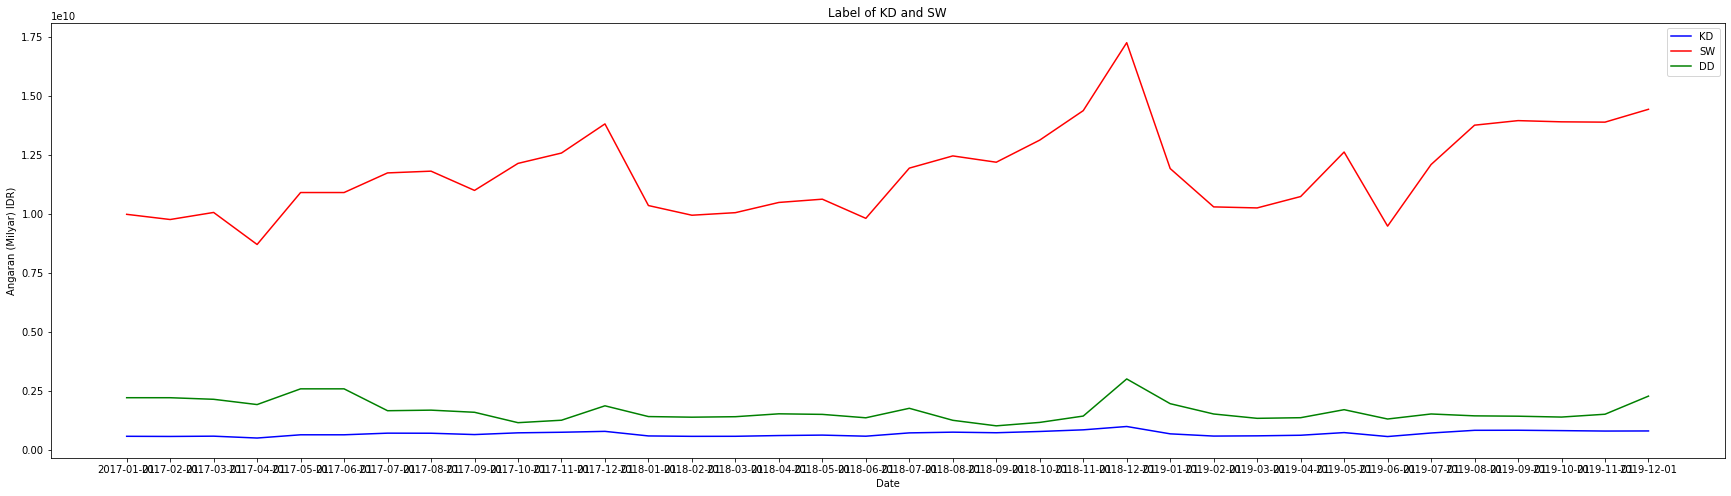

In [77]:
plt.figure(figsize=(30, 8))
plt.plot(df['date'], df['KD'], 'b-', label = 'KD')
plt.plot(df['date'], df['SW'], 'r-', label = 'SW')
plt.plot(df['date'], df['DD'], 'g-', label = 'DD')
plt.xlabel('Date'); plt.ylabel('Angaran (Milyar) IDR)'); plt.title('Label of KD and SW')
plt.legend();

### scatter plot

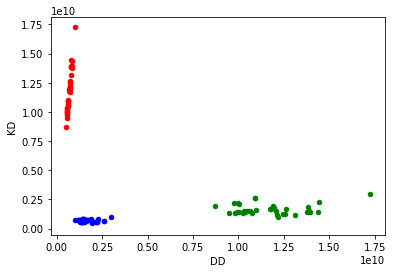

In [78]:
ax1 = df.plot(kind='scatter', x='KD', y='SW', color='r')    
ax2 = df.plot(kind='scatter', x='SW', y='DD', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='DD', y='KD', color='b', ax=ax1)
plt.show()

### train test split data 

In [182]:
df = df if df.index.name == 'date' else df.set_index('date')

In [183]:
def train_test_plit_data(data, label, columns):
    X = data.iloc[:,[i for i in range(len(columns)) if columns[i] != label]].values
    y = data.iloc[:,np.where(columns == label)[0][0] if len(np.where(columns == label)) > 0 else 0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [184]:
def scaler_data(X,y,scaler):
    X = scaler.transform(X)
    y = scaler.transform(y)
    return X,y

In [185]:
def inverse_scaler(data,scaler):
    return scaler.inverse_transform(data)

In [186]:
def get_data_forecast(data,label,columns,N):
    X = data.iloc[-N:,[i for i in range(len(columns)) if columns[i] != label]]
    return X.values

In [357]:
def plot_data(data,label,forecast,n):
    
    old_data = data[label][-n*2:]
    new_data = [np.nan for _ in range(len(old_data))]

    list_date = list(old_data.index)
    last_date = list(old_data.index)[-1]
    
    last_year = last_date.split('-')[0]
    last_month = last_date.split('-')[1]
    
    label_data = [old_data[i] for i in range(len(old_data))]
    for i in range(n):
        new_data.append(forecast_pred[i])
        label_data.append(np.nan)
        
        new_year = int(last_year)
        new_month = int(last_month)+i+1

        if new_month > 12:
            new_year += 1
            last_month= int(last_month)-12
            last_year= int(last_year)+1
            new_month -= 12
        list_date.append(str(new_year)+'-'+str('0'+str(new_month) if new_month < 10 else new_month)+'-01')
    new_df = {'date':list_date,label:label_data,'forecast':new_data}
    
    new_df = pd.DataFrame(data=new_df)
    
    # initial plot
    plt.figure(figsize=(25, 8))
    plt.plot(new_df['date'], new_df[label], 'b-', label = label)
    plt.plot(new_df['date'], new_df['forecast'], 'r-', label = 'Forecast')
    plt.xlabel('Date');
    plt.ylabel('Angaran (Milyar) IDR)');
    plt.title('Label of Prediction '+label)
    plt.savefig('static/hasilplot/{}-{}.png'.format(label,n))
    plt.show(); # show plot
    
    return new_df

In [358]:
columns = df.columns  # header of columns
n_bulan = 6 # num of month prediction
model = {}
# scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_plit_data(df,'SW',columns)
modelKD = LinearRegression()
modelKD.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [359]:
y_pred = modelKD.predict(X_test)
y_pred

forecast_pred = get_data_forecast(df,'SW',columns,n_bulan)
forecast_pred = modelKD.predict(forecast_pred)
forecast_pred

array([1.22473842e+10, 1.41257642e+10, 1.40698386e+10, 1.38407619e+10,
       1.35477376e+10, 1.37951327e+10])

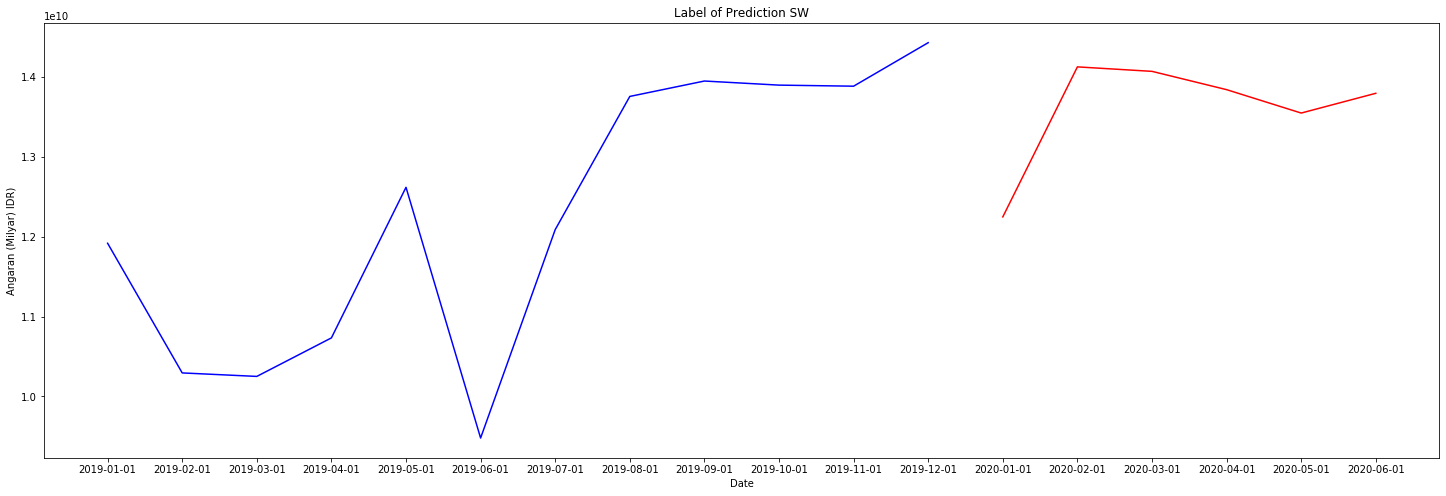

,date,SW,forecast
0,2019-01-01,1.191748e+10,NaN
1,2019-02-01,1.029382e+10,NaN
2,2019-03-01,1.025015e+10,NaN
3,2019-04-01,1.073245e+10,NaN
4,2019-05-01,1.261796e+10,NaN
5,2019-06-01,9.478569e+09,NaN
6,2019-07-01,1.208810e+10,NaN
7,2019-08-01,1.375579e+10,NaN
8,2019-09-01,1.394866e+10,NaN
9,2019-10-01,1.389741e+10,NaN


In [360]:
plot_data(df,'SW',forecast_pred,n_bulan)

ass
ssd
fdg


1
2
3
4
5
